# 목차
1. 강릉 관광 분석
    - 코로나 이후 관광 현황
    - 강릉 관광객 특성
    - 행정동 별 관광 현황
2. 지역 경제 활성화 방안
    - 여행 트렌드 : 차박, 캠핑 (Tableau)
    - Tableau 사용된 데이터 분석
3. 사용한 데이터

# 강릉의 관광 현황 분석

- 지역활성화 방안을 제시하기에 앞서 강릉시의 관광 데이터 분석을 실시하였습니다.

## 라이브러리

In [229]:
import numpy as pd
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',16)
from matplotlib import font_manager,rc
f_name=font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)
import seaborn as sns
import re
import matplotlib.pyplot as plt
from IPython.display import Image

## 데이터 로드

In [230]:
ko_2018=pd.read_csv("플랫폼통합경진대회 데이터\KORAIL)플랫폼통합경진대회 데이터\역별 승하차실적_2018.csv",encoding="UTF8")
ko_2019=pd.read_csv("플랫폼통합경진대회 데이터\KORAIL)플랫폼통합경진대회 데이터\역별 승하차실적_2019.csv",encoding="UTF8")
ko_2020=pd.read_csv("플랫폼통합경진대회 데이터\KORAIL)플랫폼통합경진대회 데이터\역별 승하차실적_2020.csv",encoding="UTF8")
ko_2021=pd.read_csv("플랫폼통합경진대회 데이터\KORAIL)플랫폼통합경진대회 데이터\역별 승하차실적_2021.csv",encoding="UTF8")

df_2019=pd.read_csv("플랫폼통합경진대회 데이터\KORAIL)플랫폼통합경진대회 데이터\고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2019.csv",encoding="UTF8")
df_2020=pd.read_csv("플랫폼통합경진대회 데이터\KORAIL)플랫폼통합경진대회 데이터\고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2020.csv",encoding="UTF8")
df_2021=pd.read_csv("플랫폼통합경진대회 데이터\KORAIL)플랫폼통합경진대회 데이터\고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2021.csv",encoding="UTF8")

age_sex=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_시군구\(KT)플랫폼통합경진대회_강릉시_시군구_2.성연령별관광객수.csv",encoding="cp949")
day=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_시군구\(KT)플랫폼통합경진대회_강릉시_시군구_1.일별관광객수.csv",encoding="cp949")
time=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_시군구\(KT)플랫폼통합경진대회_강릉시_시군구_3.시간대별관광객수.csv",encoding="cp949")
from_city=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_시군구\(KT)플랫폼통합경진대회_강릉시_시군구_6.거주지기반유입비율.csv",encoding="cp949")
move=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_시군구\(KT)플랫폼통합경진대회_강릉시_시군구_7.24시간이후이동비율(외지인).csv",encoding="cp949")
foreign=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_시군구\(KT)플랫폼통합경진대회_강릉시_시군구_4.국적별관광객수.csv",encoding="cp949")
move_f=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_시군구\(KT)플랫폼통합경진대회_강릉시_시군구_8.24시간이후유출비율(외국인).csv",encoding="cp949")



data=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_행정동\(KT)플랫폼통합경진대회_강릉시_행정동_1.일별관광객수.csv",encoding="cp949")
data2=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_행정동\(KT)플랫폼통합경진대회_강릉시_행정동_2.성연령별관광객수.csv",encoding="cp949")
data3=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_행정동\(KT)플랫폼통합경진대회_강릉시_행정동_3.시간대별관광객수.csv",encoding="cp949")
data4=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_행정동\(KT)플랫폼통합경진대회_강릉시_행정동_4.국적별관광객수.csv",encoding="cp949")
data5=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_행정동\(KT)플랫폼통합경진대회_강릉시_행정동_6.거주지기반유입비율.csv",encoding="cp949")
data6=pd.read_csv("플랫폼통합경진대회 데이터\KT)플랫폼통합경진대회 데이터\(KT)플랫폼통합경진대회_강릉시_행정동\(KT)플랫폼통합경진대회_강릉시_행정동_7.24시간이후이동비율(외지인).csv",encoding="cp949")

## 코로나 이후 관광 현황

<AxesSubplot:xlabel='year', ylabel='승차인원수'>

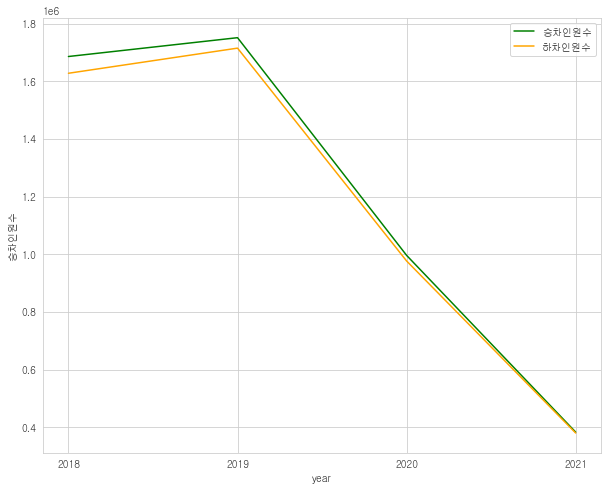

In [231]:
#전처리
ko_2018[['승차인원수','하차인원수']]=ko_2018[['승차인원수','하차인원수']].apply(lambda x : x.str.replace(",",""))
ko_2018[['승차인원수','하차인원수']]=ko_2018[['승차인원수','하차인원수']].astype('int')
ko_2019[['승차인원수','하차인원수']]=ko_2019[['승차인원수','하차인원수']].apply(lambda x : x.str.replace(",",""))
ko_2019[['승차인원수','하차인원수']]=ko_2019[['승차인원수','하차인원수']].astype('int')
ko_2020[['승차인원수','하차인원수']]=ko_2020[['승차인원수','하차인원수']].apply(lambda x : x.str.replace(",",""))
ko_2020[['승차인원수','하차인원수']]=ko_2020[['승차인원수','하차인원수']].astype('int')
ko_2021[['승차인원수','하차인원수']]=ko_2021[['승차인원수','하차인원수']].apply(lambda x : x.str.replace(",",""))
ko_2021[['승차인원수','하차인원수']]=ko_2021[['승차인원수','하차인원수']].astype('int')

#운행일자별 강릉역 승하차 인원수 
table1=ko_2018[['운행일자','정차역','승차인원수','하차인원수']].groupby(['운행일자','정차역']).sum()
gang_2018=table1.xs('강릉',level='정차역')
table2=ko_2019[['운행일자','정차역','승차인원수','하차인원수']].groupby(['운행일자','정차역']).sum()
gang_2019=table2.xs('강릉',level='정차역')
table3=ko_2020[['운행일자','정차역','승차인원수','하차인원수']].groupby(['운행일자','정차역']).sum()
gang_2020=table3.xs('강릉',level='정차역')
table4=ko_2021[['운행일자','정차역','승차인원수','하차인원수']].groupby(['운행일자','정차역']).sum()
gang_2021=table4.xs('강릉',level='정차역')
total=pd.concat([gang_2018,gang_2019])
total=pd.concat([total,gang_2020])
total=pd.concat([total,gang_2021])

#연도별 강릉역 승하차 인원수 추이 확인
total.reset_index(inplace=True)
total['year']=total['운행일자'].apply(lambda x : x[:4])
total_all=total[['year','승차인원수','하차인원수']].groupby(['year']).sum().reset_index()
fig=plt.figure(figsize=(10,8))
sns.lineplot(x='year',y='승차인원수',data=total_all,label='승차인원수',color='green')
sns.lineplot(x='year',y='하차인원수',data=total_all,label='하차인원수',color='orange')

- 강릉역 승하차 인원을 4개년도 비교했을 때, 코로나로 인해 강릉에서의 __2019년 이후 승차하인원수 모두 감소세__를 보이고 있습니다.  
하지만, 2021년은 5월 31일까지만 데이터가 있어 다른 연도에 비해 매우 작은 수치를 보입니다.


<AxesSubplot:xlabel='year', ylabel='승차인원수'>

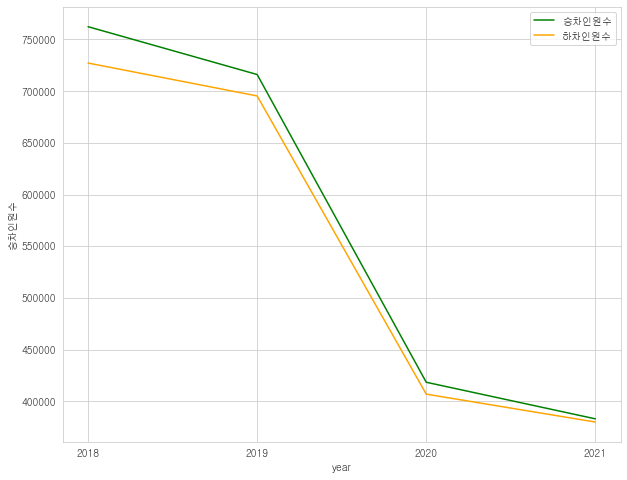

In [232]:
#같은 기간동안의 승하차 인원 ㅎ
gang_2018=gang_2018.loc[:'2018년 05월 31일',:]
gang_2019=gang_2019.loc[:'2019년 05월 31일',:]
gang_2020=gang_2020.loc[:'2020년 05월 31일',:]
total=pd.concat([gang_2018,gang_2019])
total=pd.concat([total,gang_2020])
total=pd.concat([total,gang_2021])
total.reset_index(inplace=True)
total['year']=total['운행일자'].apply(lambda x : x[:4])
total_term=total[['year','승차인원수','하차인원수']].groupby(['year']).sum().reset_index()
fig=plt.figure(figsize=(10,8))
sns.lineplot(x='year',y='승차인원수',data=total_term,label='승차인원수',color='green')
sns.lineplot(x='year',y='하차인원수',data=total_term,label='하차인원수',color='orange')

- 4개년도 모두 1월1일~5월 31일 데이터만 비교했을 때는 코로나 시국이 아니었던 2018년에서 2019년도의 변화에서도 __지속적인 감소 추세__를 보이고, 2019년 이후로 급격히 감소한 것을 볼 수 있습니다

<AxesSubplot:xlabel='도착역명', ylabel='인원'>

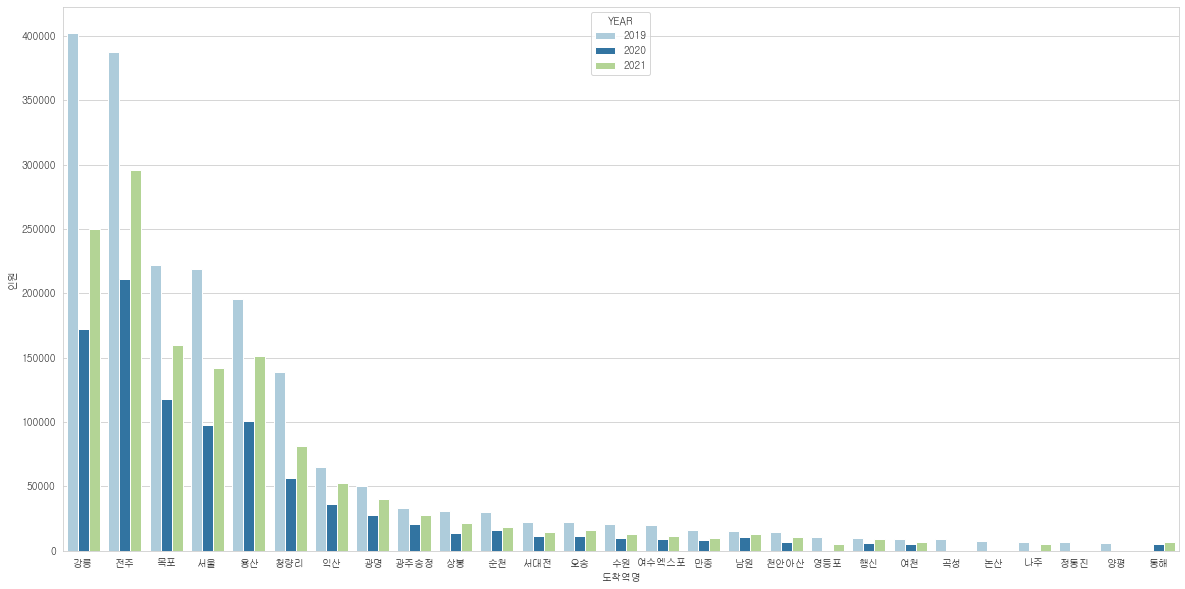

In [233]:
#전처리, YEA,MONTH 컬럼 생성
for df in [df_2019,df_2020,df_2021]:
    df['운행일자']=df['운행일자'].astype('str')
    df['YEAR']=df['운행일자'].apply(lambda x : x[:4])
    df['MONTH']=df['운행일자'].apply(lambda x : x[4:6])
    
#3개년도 데이터 합치기
total_df=pd.concat([df_2019,df_2020])
total_df=pd.concat([total_df,df_2021])

#도착역기준으로 연도별 총 이용인원 
dest=total_df[['YEAR','도착역명','인원']].groupby(['YEAR','도착역명']).sum().sort_values(by=['YEAR','인원'],ascending=[True,False]).reset_index()
plt.figure(figsize=(20,10))
#1년동안 5000명 이상이 이용한 도착역만 확인
sns.barplot(x='도착역명',y='인원',hue='YEAR',data=dest.query("인원>5000"),palette="Paired")

- 도착역명을 기준으로 철도 서비스 이용객수를 확인해 보았을때, 강릉은 2019년에 가장 많은 승객들이 도착했으나,   
2020년 이후로는 전주가 가장 많은 승객들이 도착한 역입니다.
- korail데이터의 승하차 실적 및 이용 정보로는 __강릉으로 방문하는 승객들의 인원이 감소__하고 있다는 것을 알 수 있습니다.

In [234]:
#출발지별 koreail을 통한 강릉 방문 객수
departure=pd.pivot_table(index=['출발역명'],data=total_df.loc[total_df.도착역명=='강릉'],values=['인원'],aggfunc='sum')
departure.sort_values(by='인원',ascending=False)
departure=departure.query("인원>5000")
departure

,인원
출발역명,
동해,15349
만종,36329
묵호,11716
상봉,57327
서울,352717
양평,12332
정동진,17274
청량리,282527
평창,6916


- 어느 역에서의 이용객이 강릉으로 오는지를 확인해보면 5000명 이상의 이용객이 출발한 역은 모두 __KTX 강릉선__이 지나가는 역입니다.  
강릉으로 오는 대부분의 승객들은 철도 중 __ktx가 주운행선__임을 알 수 있습니다

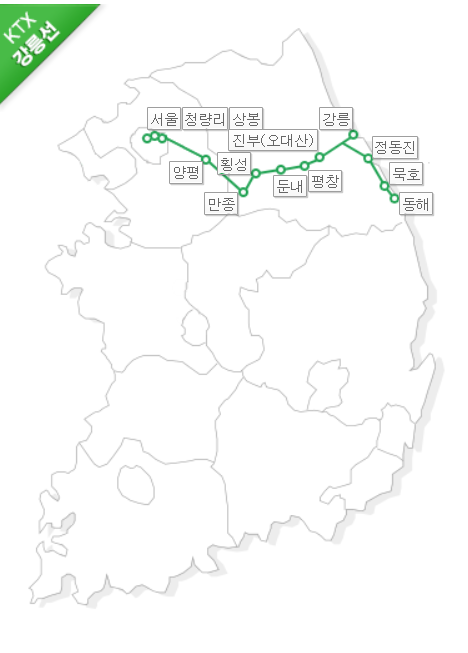

In [235]:
Image("C:/Users/lg_gram/Intel/Daycon/강릉선 노선.png")

In [236]:
#전처리
day=day[['ETL_YMD','I_CNT','O_CNT','F_CNT']]
day['ETL_YMD']=day['ETL_YMD'].astype('str')
day['I_CNT']=day['I_CNT'].apply(lambda x : x.replace(',',''))
day['O_CNT']=day['O_CNT'].apply(lambda x : x.replace(',',''))
day['F_CNT']=day['F_CNT'].apply(lambda x : x.replace(' - ','0'))
day['F_CNT']=day['F_CNT'].astype('int')
day['I_CNT']=day['I_CNT'].astype('int')
day['O_CNT']=day['O_CNT'].astype('int')
day['YEAR']=day['ETL_YMD'].apply(lambda x : x[:4])

#연도별 관광객 수
year_sum=day[['YEAR','I_CNT','O_CNT','F_CNT']].groupby(['YEAR']).sum()
year_sum['total']=year_sum['I_CNT']+year_sum['O_CNT']+year_sum['F_CNT'];
year_sum.columns=[['현지인','외지인','외국인','전체 관광객 수']]
year_sum

,현지인,외지인,외국인,전체 관광객 수
YEAR,,,,
2019,14045637,7149779,31426,21226842
2020,13622865,6923247,3556,20549668
2021,16011397,6994489,3500,23009386


- 코로나 상황이 조금 진정된 2021년에는 전체 관광객 수는 2019년 대비해서 증가하였으며, __현지인관광객 증가__가 영향을 미쳤습니다.
- 현지인 관광객을 제외하고 외지인 관광객수와 외국인 관광객 수는 2019년 대비하여 감소하였으나, 2021년에는 반등하고  
있는 모습을 볼 수 있습니다.
- korail 데이터를 고려했을 때, 승하차인원이 2021년에 감소했음에도 강릉으로 오는 전체 관광객 수는 증가했기 때문에 철도가 아닌
다른 교통수단으로 방문하는 관광객이 많다는 것을 알 수 있다.

<AxesSubplot:xlabel='운행요일', ylabel='강릉'>

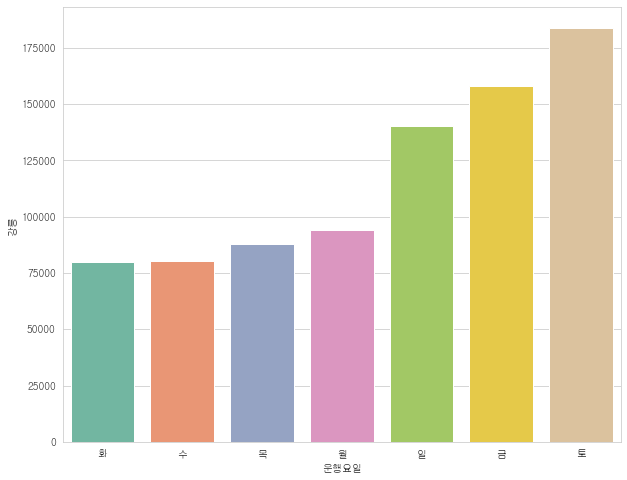

In [237]:
#요일별 강릉 방문 이용객 수
days=pd.crosstab(total_df['운행요일'],total_df['도착역명'],total_df['인원'],aggfunc='sum')
days=days[['강릉']].reset_index().sort_values(by=['강릉'])
plt.figure(figsize=(10,8))
sns.barplot(x='운행요일',y='강릉',data=days,palette="Set2")

- 요일별 방문특성을 보면 korail을 이용하여 강릉을 방문하는 이용객 수는 __주로 주말__로 집중되어 있고, 화,수에 가장 낮은 이용객 수를 보입니다

## 강릉 관광객 특성

In [238]:
#전처리
age_sex['ETL_YMD']=age_sex['ETL_YMD'].astype('str')
age_sex['I_CNT']=age_sex['I_CNT'].apply(lambda x : x.replace(',',''))
age_sex['O_CNT']=age_sex['O_CNT'].apply(lambda x : x.replace(',',''))
age_sex['I_CNT']=age_sex['I_CNT'].astype('int')
age_sex['O_CNT']=age_sex['O_CNT'].astype('int')
age_sex['YEAR']=age_sex['ETL_YMD'].apply(lambda x : x[:4])
age_sex['TOTAL']=age_sex['O_CNT']+age_sex['I_CNT']
#성별 방문객 수 확인

fm=age_sex[['SEX_DIV_CD','I_CNT','O_CNT']].groupby(['SEX_DIV_CD']).sum()
fm['total']=fm['I_CNT']+fm['O_CNT']
fm

,I_CNT,O_CNT,total
SEX_DIV_CD,,,
F,20815810,9800369,30616179
M,22864088,11267124,34131212


- 여성보다는 남성 관광객의 수가 현지인관광객, 외지인 관광객 수 모두에서 더 높습니다.

Text(0.5, 1.0, '강릉 연령대별 관광객 수')

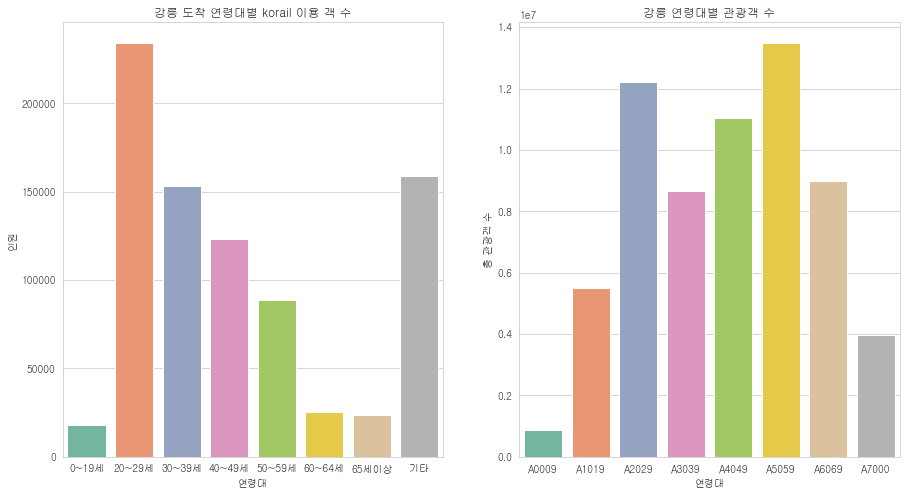

In [239]:

#강릉에 주로 방문하는 korail 이용객 연령대 확인
pivot=pd.pivot_table(total_df.loc[total_df.도착역명=='강릉'],index=['연령대'],columns=['도착역명'],values=['인원'],aggfunc='sum').reset_index()
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(1,2,1)
sns.barplot(x=('연령대',   ''),y=( '인원', '강릉'),data=pivot,palette="Set2")
plt.xlabel("연령대")
plt.ylabel("인원")
plt.title("강릉 도착 연령대별 korail 이용 객 수")

#일별관광객수로 관광객 주 연령대층 확인
day_age=age_sex[['AGE_DIV_CD','TOTAL']].groupby(['AGE_DIV_CD']).sum()
day_age=day_age.reset_index()
ax=fig.add_subplot(1,2,2)
sns.barplot(x='AGE_DIV_CD',y='TOTAL',data=day_age,palette="Set2")
plt.xlabel("연령대")
plt.ylabel("총 관광객 수")
plt.title("강릉 연령대별 관광객 수")

- Korail의 이용정보 데이터를 통해 __철도를 이용하여 가장 많이 강릉에 방문하는 연령대는 20대와 30대__라는 사실을 알 수 있습니다.
- 하지만, 현지인, 외지인 관광객을 모두 합친 __일별 관광객 수로는 50대__가 가장 많고, 그다음이 20대 입니다.
- 즉, 관광객 중 20,30대는 다른 연령대에 비해 korail 이용이 많다는 것을 알 수 있습니다.

Text(0, 0.5, '인원')

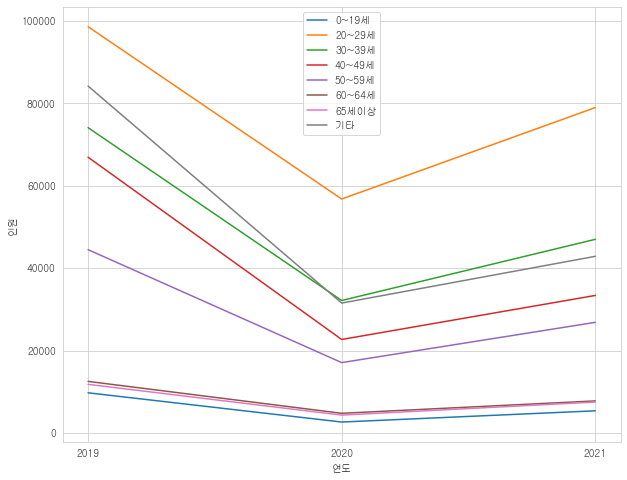

In [240]:
#철도이용 연도별 연령대별 이용객수 (강릉)
age_num=pd.pivot_table(data=total_df.loc[total_df.도착역명=='강릉'],columns=['연령대'],index=['YEAR'],values=['인원'],aggfunc=['sum']).reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax=sns.lineplot(x=('YEAR',   '',       ''),y=( 'sum', '인원',  '0~19세'),data=age_num,label='0~19세')
ax=sns.lineplot(x=('YEAR',   '',       ''),y=( 'sum', '인원',  '20~29세'),data=age_num,label='20~29세')
ax=sns.lineplot(x=('YEAR',   '',       ''),y=( 'sum', '인원',  '30~39세'),data=age_num,label='30~39세')
ax=sns.lineplot(x=('YEAR',   '',       ''),y=( 'sum', '인원',  '40~49세'),data=age_num,label='40~49세')
ax=sns.lineplot(x=('YEAR',   '',       ''),y=( 'sum', '인원',  '50~59세'),data=age_num,label='50~59세')
ax=sns.lineplot(x=('YEAR',   '',       ''),y=( 'sum', '인원',  '60~64세'),data=age_num,label='60~64세')
ax=sns.lineplot(x=('YEAR',   '',       ''),y=( 'sum', '인원',  '65세이상'),data=age_num,label='65세이상')
ax=sns.lineplot(x=('YEAR',   '',       ''),y=( 'sum', '인원',  '기타'),data=age_num,label='기타')
plt.legend()
plt.xlabel("연도")
plt.ylabel("인원")

- Korail 연령대별 이용객 수의 추이를 확인해볼 때, 20대 관광객 수의 반등폭이 가장 크고, 30,40,50 또한 2021년에 회복추이를 보이고 있습니다
- __외부로부터 오는 관광객의 회복세__를 볼 수 있습니다.

Text(0, 0.5, '외지인 관광객 수')

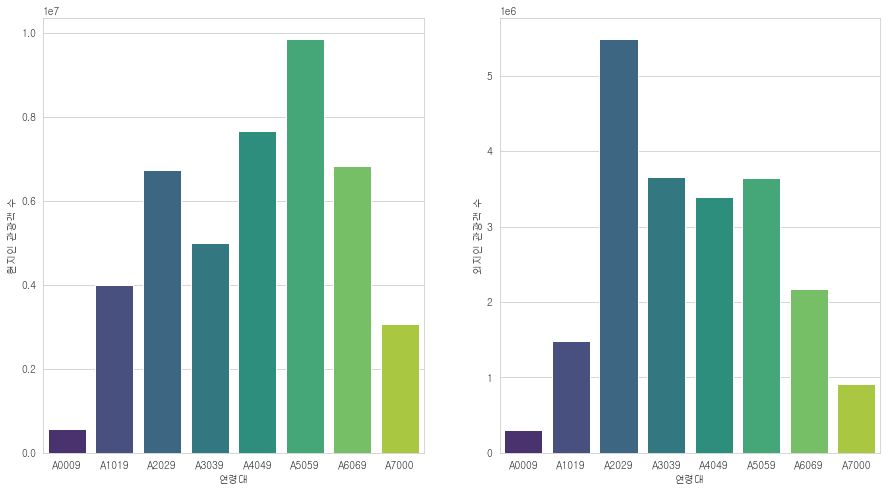

In [241]:
#연령대별 현지인, 외지인 관광객 수
age=age_sex[['AGE_DIV_CD','I_CNT','O_CNT']].groupby(['AGE_DIV_CD']).sum().reset_index()
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(1,2,1)
ax=sns.barplot(x='AGE_DIV_CD',y='I_CNT',data=age,palette="viridis")
plt.xlabel("연령대")
plt.ylabel("현지인 관광객 수")
ax=fig.add_subplot(1,2,2)
ax=sns.barplot(x='AGE_DIV_CD',y='O_CNT',data=age,palette="viridis")
plt.xlabel("연령대")
plt.ylabel("외지인 관광객 수")

- __현지인 관광객의 경우에는 4050세대의 관광객 수가 가장 많고, 외지인의 경우에는 20대가 압도적__으로 높습니다.
- 전체적으로 연령대별 관광객 수는 20,30,40대에서 높지만 외지인과 현지인 관광객을 나누어 보게 되면 관광객의 연령대 차이가 존재합니다.

Text(0, 0.5, '외지인 관광객 수')

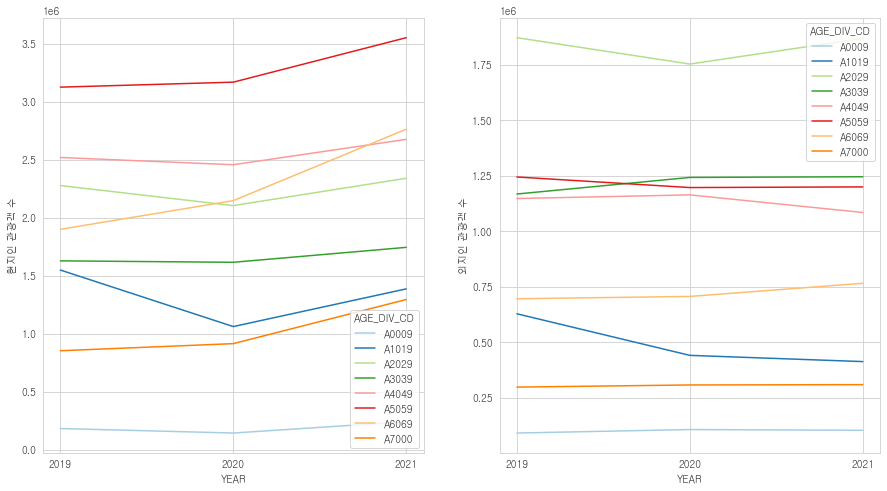

In [242]:
#연령대별 현지인, 외지인 관광객 수의 추이
year_age=age_sex[['YEAR','AGE_DIV_CD','O_CNT','I_CNT']].groupby(['YEAR','AGE_DIV_CD']).sum().reset_index()
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(1,2,1)
ax=sns.lineplot(x='YEAR',y='I_CNT',hue='AGE_DIV_CD',data=year_age,palette="Paired")
plt.ylabel("현지인 관광객 수")
ax=fig.add_subplot(1,2,2)
ax=sns.lineplot(x='YEAR',y='O_CNT',hue='AGE_DIV_CD',data=year_age,palette="Paired")
plt.ylabel("외지인 관광객 수")

- 현지인과 외지인을 구분하여 연령대별 추이를 보면 현지인 관광객 수는 10대,20대를 제외하고 코로나에도 불구하고 꾸준히 증가하였습니다.
- 외지인 관광객 수는 10,40,50대가 2019년 대비 조금 감소하였으며,20대 관광객의 수가 2020년 이후 반등폭이 가장 크다는 것을 다시한번 확인할 수 있습니다

Text(0, 0.5, '관광객 수')

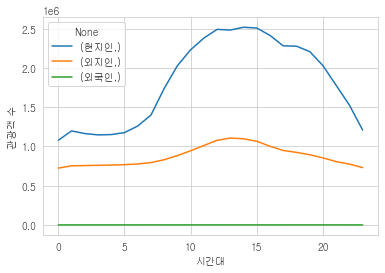

In [243]:
#전처리
time['ETL_YMD']=time['ETL_YMD'].astype('str')
time['I_CNT']=time['I_CNT'].apply(lambda x : x.replace(',',''))
time['O_CNT']=time['O_CNT'].apply(lambda x : x.replace(',',''))
time['F_CNT']=time['F_CNT'].apply(lambda x : x.replace(' - ','0'))
time['F_CNT']=time['F_CNT'].astype('int')
time['I_CNT']=time['I_CNT'].astype('int')
time['O_CNT']=time['O_CNT'].astype('int')
time['YEAR']=time['ETL_YMD'].apply(lambda x : x[:4])


time_f=time[['TIMEZN_DIV_CD','I_CNT','O_CNT','F_CNT']].groupby(['TIMEZN_DIV_CD']).sum()
time_f.columns=[['현지인','외지인','외국인']]
time_f.plot()
plt.xlabel("시간대")
plt.ylabel("관광객 수")


- 관광객들의 활동시간을 보면 12시에서 3시 사이의 관광객 수가 가장 많고, 3가지 관광객 유형의 패턴도 비슷합니다.

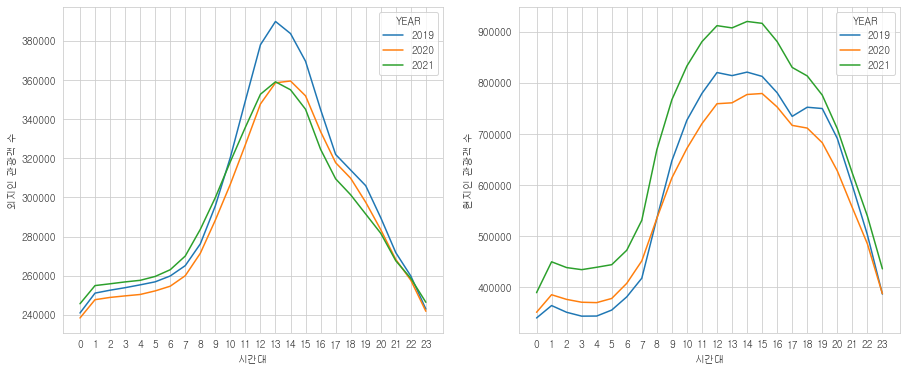

In [244]:
#연도별 시간대별 관광객 수 변화
time2=time[['YEAR','TIMEZN_DIV_CD','O_CNT','I_CNT']].groupby(['YEAR','TIMEZN_DIV_CD']).sum().reset_index()
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,2,1)
ax=sns.lineplot(x='TIMEZN_DIV_CD',y='O_CNT',hue='YEAR',data=time2)
plt.ylabel("외지인 관광객 수")
plt.xlabel("시간대")
plt.xticks(np.arange(0,24,1))
ax=fig.add_subplot(1,2,2)
ax=sns.lineplot(x='TIMEZN_DIV_CD',y='I_CNT',hue='YEAR',data=time2)
plt.ylabel("현지인 관광객 수")
plt.xlabel("시간대")
plt.xticks(np.arange(0,24,1))
plt.show()

- 현지인 관광객 수는 2019년보다 2021년이 가장 많았기 때문에 2021년의 시간대별 관광객수가 가장 높은 것을 볼 수 있습니다.
- 외지인 관광객 수는 3개년 중 2019년에 가장 높았음에도 __22시이후~오전 9시까지의 관광객 수__가 2021년에 더 높다는 특징이 있는 것으로 보아  
전보다 __숙박을 하는 관광객이 증가__했다고 볼 수 있습니다.

In [245]:
#전처리
from_city['ETL_YMD']=from_city['ETL_YMD'].astype('str')
from_city['YEAR']=from_city['ETL_YMD'].apply(lambda x : x[:4])
from_city['CITY']=from_city['RESD_INFO'].apply(lambda x: x.split(" ")[0])

#광역시도 거주지별 유입비율 평균
big_city=from_city[['CITY','O_RATE_CNT']].groupby(['CITY']).mean().sort_values(by=['O_RATE_CNT'],ascending=False)
big_city.rename(columns={'O_RATE_CNT':'유입 비율'},inplace=True)
big_city

,유입 비율
CITY,
강원도,1.913295
서울특별시,0.818008
경기도,0.664298
인천광역시,0.424024
세종특별자치도,0.348980
세종특별자치시,0.347605
대전광역시,0.264658
충청북도,0.218245
제주특별자치도,0.143289


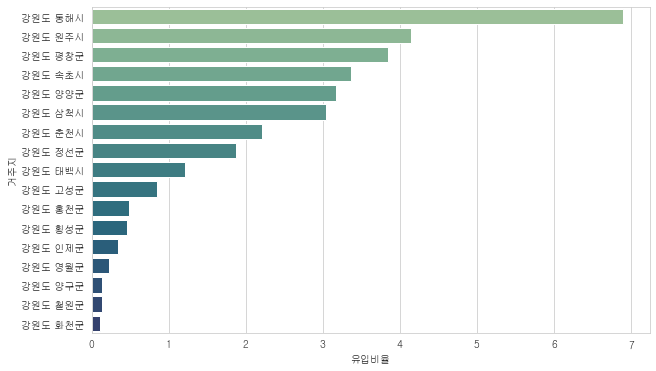

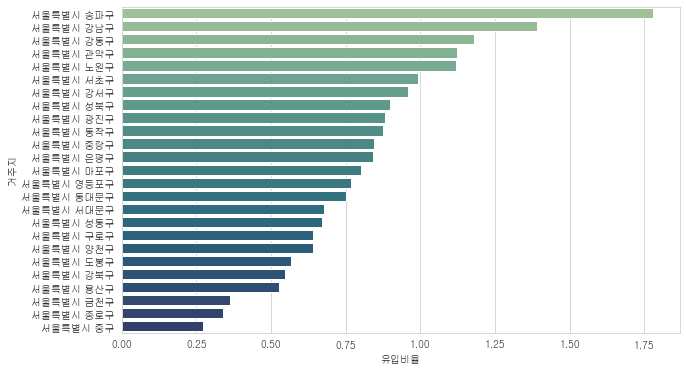

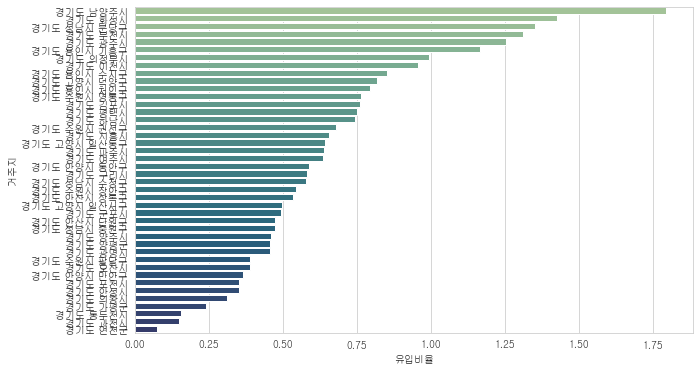

In [246]:
#유입비율 평균이 0.5이상인 광역시도에서의 시군구별 유입비율
for city in ['강원도','서울특별시','경기도']:
    df=from_city.loc[from_city.CITY==city][['RESD_INFO','O_RATE_CNT']].groupby(['RESD_INFO']).mean().sort_values(by=['O_RATE_CNT'],ascending=False).reset_index()
    fig=plt.figure(figsize=(10,6))
    sns.barplot(y='RESD_INFO',x='O_RATE_CNT',data=df,palette="crest")
    plt.xlabel("유입비율")
    plt.ylabel("거주지")

- 거주지별 관광객의 유입비율을 보면 같은 행정구역인 강원도에서의 유입비율이 가장 높으며, 그 다음으로는 서울과 경기도 등 수도권 지역에서의 유입비율이 높은 것을 알 수 있습니다.
- 광역시도에서 시군구로 거주지 기반을 보면 강원도에서는 동해시에서 가장 많이 방문합니다.
- 제주도 보다 전라남도에서의 유입비율이 더 낮은 것을 보아 물리적 거리보다는 접근성이 유입비율에 영향을 미칩니다.


Text(0, 0.5, '이동 시군구')

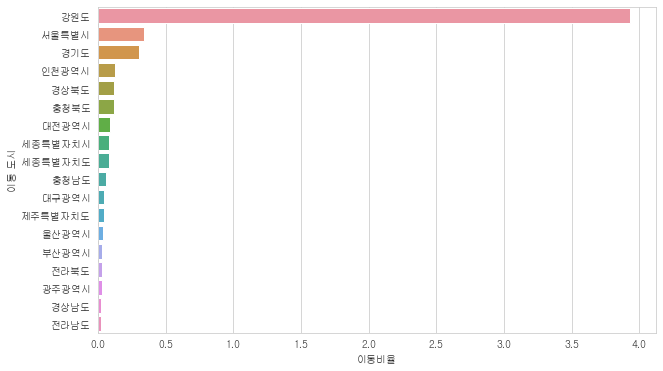

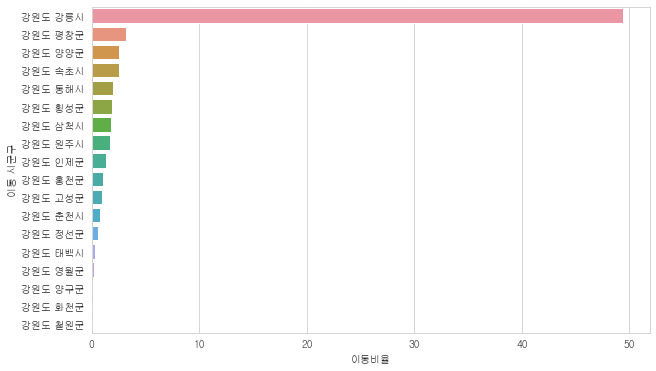

In [247]:
#전처리
move['ETL_YMD']=move['ETL_YMD'].astype('str')
move['YEAR']=move['ETL_YMD'].apply(lambda x : x[:4])
move['CITY']=move['RESD_INFO'].apply(lambda x: x.split(" ")[0])

#광역도시별 외지인의 이동비율
city_move=move[['CITY','O_RATE_CNT']].groupby(['CITY']).mean().sort_values(by=['O_RATE_CNT'],ascending=False).reset_index()
fig=plt.figure(figsize=(10,6))
sns.barplot(y='CITY',x='O_RATE_CNT',data=city_move)
plt.xlabel("이동비율")
plt.ylabel("이동 도시")

#강원도 내 시군구별 외지인의 이동비율
df=move.loc[move.CITY=='강원도'][['RESD_INFO','O_RATE_CNT']].groupby(['RESD_INFO']).mean().sort_values(by=['O_RATE_CNT'],ascending=False).reset_index()
fig=plt.figure(figsize=(10,6))
sns.barplot(y='RESD_INFO',x='O_RATE_CNT',data=df)
plt.xlabel("이동비율")
plt.ylabel("이동 시군구")

- 외지인의 24시간 이후 이동비율은 강원도가 압도적으로 높으며, 그중에서도 강릉시가 압도적으로 높습니다.
즉, 많은 사람들은 강릉에 방문한 후,  
__최소 1박 2일__은 강릉에 머문다는 사실을 알 수 있습니다

Text(0, 0.5, '관광객 수')

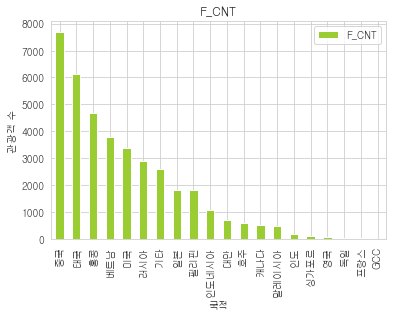

In [248]:
#전처리
foreign['F_CNT']=foreign['F_CNT'].apply(lambda x : x.replace(' - ','0'))
foreign['F_CNT']=foreign['F_CNT'].astype('int')
foreign['ETL_YMD']=foreign['ETL_YMD'].astype('str')

foreign.CNTRY_NM.unique()

nation=foreign[['CNTRY_NM','F_CNT']].groupby(['CNTRY_NM']).sum().sort_values(by=['F_CNT'],ascending=False)

nation.plot(kind='bar',subplots=True,color="yellowgreen")
plt.xlabel("국적")
plt.ylabel("관광객 수")

- 국적별 외국인 관광객 수는 중국이 압도적으로 높습니다

Text(0, 0.5, '이동 시군구')

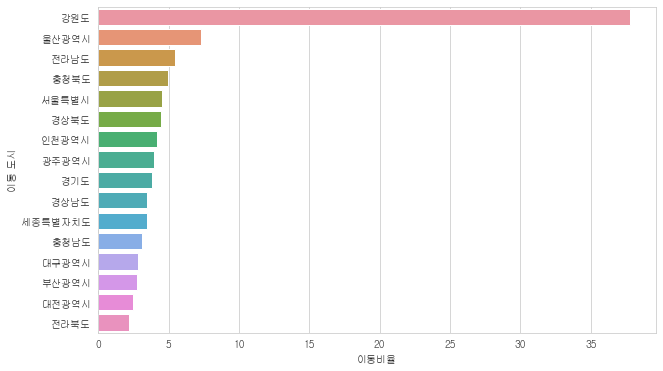

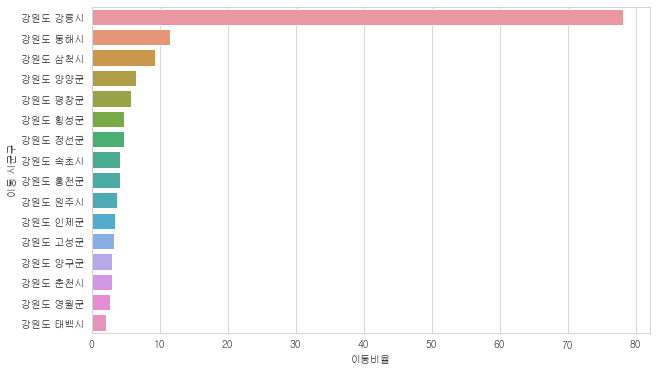

In [249]:
#전처리
move_f['ETL_YMD']=move_f['ETL_YMD'].astype('str')
move_f['YEAR']=move_f['ETL_YMD'].apply(lambda x : x[:4])
move_f['CITY']=move_f['RESD_INFO'].apply(lambda x: x.split(" ")[0])
#광역도시별 외국인의 이동비율
city_f=move_f[['CITY','F_RATE_CNT']].groupby(['CITY']).mean().sort_values(by=['F_RATE_CNT'],ascending=False).reset_index()
fig=plt.figure(figsize=(10,6))
sns.barplot(y='CITY',x='F_RATE_CNT',data=city_f)
plt.xlabel("이동비율")
plt.ylabel("이동 도시")

#강원도 시군구별 외국인의 이동비율
df_f=move_f.loc[move_f.CITY=='강원도'][['RESD_INFO','F_RATE_CNT']].groupby(['RESD_INFO']).mean().sort_values(by=['F_RATE_CNT'],ascending=False).reset_index()
fig=plt.figure(figsize=(10,6))
sns.barplot(y='RESD_INFO',x='F_RATE_CNT',data=df_f)
plt.xlabel("이동비율")
plt.ylabel("이동 시군구")

- 외국인도 마찬가지로 24시간 이후에 강원도에 머무는 비율이 가장 높으며, 그중에서도 강릉에서 머무는 비율이 가장 높습니다.
- 하지만, 외지인 관광객의 경우에는 거주지 기반 유입비율과 이동비율이 전라남도에서 가장 낮은데 외국인의 이동비율에서는 3번째로 가장 높습니다.
또한, 울산 광역시로의 이동비율도 높아 외지인과는 다른 이동 요인이 영향을 끼친다고 볼 수 있습니다.

## 행정동별 관광 현황
- 강릉시의 행정동별 관광 현황을 살펴보겠습니다.

Text(0, 0.5, '전체 관광객 수')

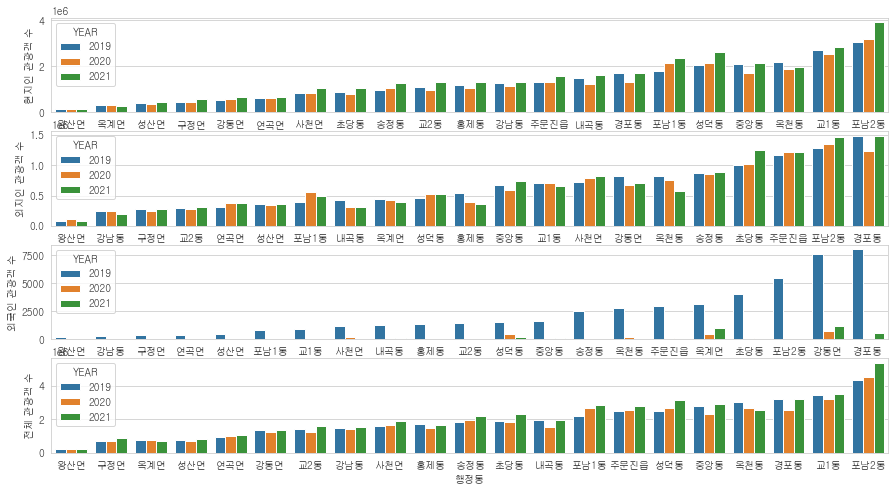

In [250]:
#행정동별 관광객 수
#전처리
data['ETL_YMD']=data['ETL_YMD'].astype('str')
data['I_CNT']=data['I_CNT'].apply(lambda x : x.replace(',',''))
data['O_CNT']=data['O_CNT'].apply(lambda x : x.replace(',',''))
data['F_CNT']=data['F_CNT'].apply(lambda x : x.replace(' - ','0'))
data['F_CNT']=data['F_CNT'].astype('int')
data['I_CNT']=data['I_CNT'].astype('int')
data['O_CNT']=data['O_CNT'].astype('int')
data['YEAR']=data['ETL_YMD'].apply(lambda x : x[:4])
data['MONTH']=data['ETL_YMD'].apply(lambda x : x[4:6])

#연도별 행정동별 관광객 수
area=data[['YEAR','ADMDONG_NM','I_CNT','O_CNT','F_CNT']].groupby(['YEAR','ADMDONG_NM']).sum().sort_values(by=['YEAR','I_CNT']).reset_index()
fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(4,1,1)
ax=sns.barplot(x='ADMDONG_NM',y='I_CNT',hue='YEAR',data=area)
plt.xlabel("행정동")
plt.ylabel("현지인 관광객 수")
ax=fig.add_subplot(4,1,2)
area.sort_values(by=['YEAR','O_CNT'],inplace=True)
ax=sns.barplot(x='ADMDONG_NM',y='O_CNT',hue='YEAR',data=area)
plt.xlabel("행정동")
plt.ylabel("외지인 관광객 수")
ax=fig.add_subplot(4,1,3)
area.sort_values(by=['YEAR','F_CNT'],inplace=True)
ax=sns.barplot(x='ADMDONG_NM',y='F_CNT',hue='YEAR',data=area)
plt.xlabel("행정동")
plt.ylabel("외국인 관광객 수")

#전체 관광객
ax=fig.add_subplot(4,1,4)
area['total']=area['I_CNT']+area['O_CNT']+area['F_CNT']
area.sort_values(by=['YEAR','total'],inplace=True)
ax=sns.barplot(x='ADMDONG_NM',y='total',hue='YEAR',data=area)
plt.xlabel("행정동")
plt.ylabel("전체 관광객 수")

- 강릉시에서 인구와 상업 발달이 집중된 __동지역을 중심__으로 관광객 수가 분포되고 있습니다.
- 동지역이 아닌 행정동 중에서 구정면, 연곡면, 성산면, 사천면,주문진읍의 관광객 수가 2021년에 증가하였습니다. 

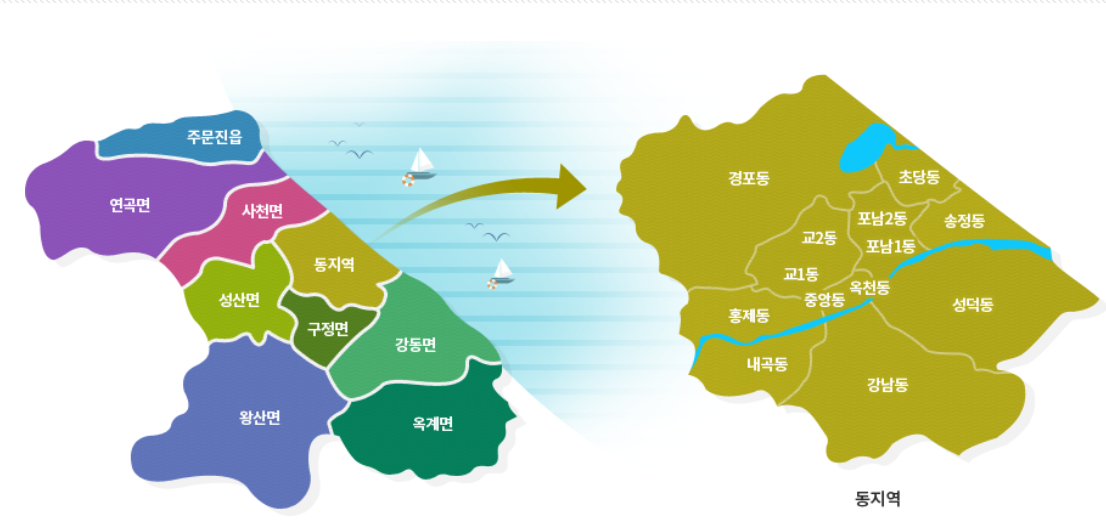

In [251]:
Image("C:/Users/lg_gram/Intel/Daycon/동지역.png")

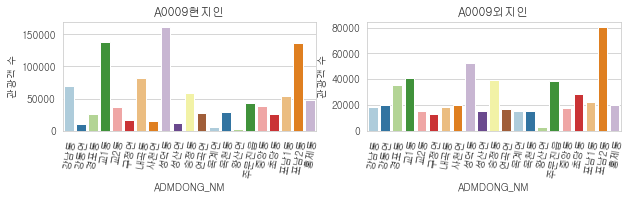

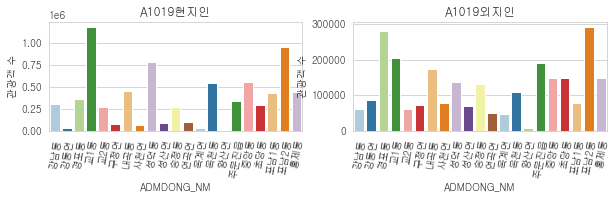

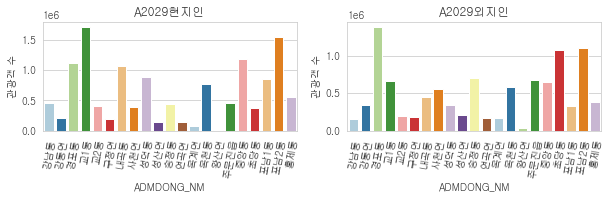

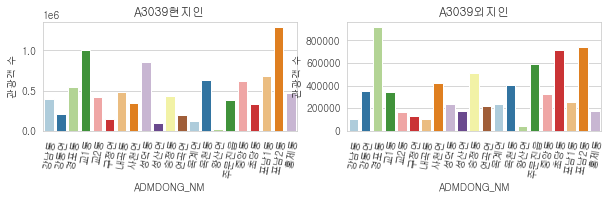

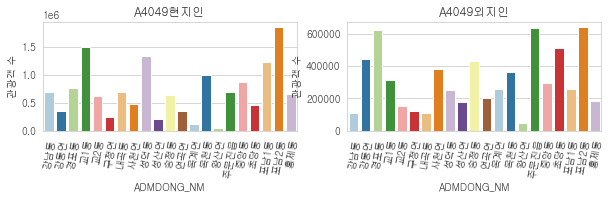

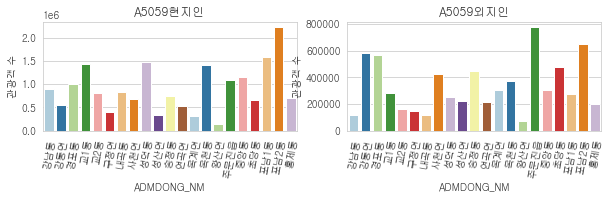

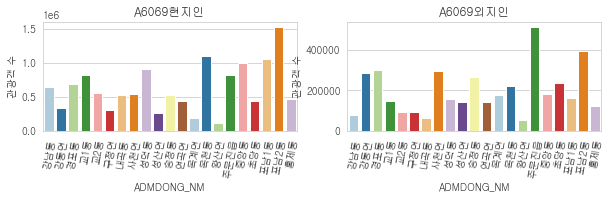

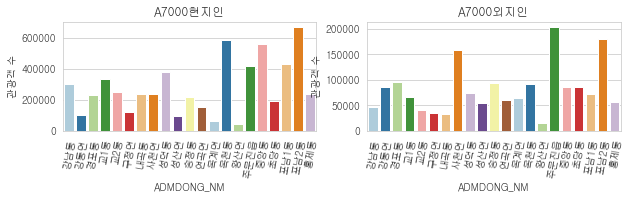

In [252]:
#연령대별 행정동별 현지인, 외지인 관광객 수
#전처리
data2['ETL_YMD']=data2['ETL_YMD'].astype('str')
data2['I_CNT']=data2['I_CNT'].apply(lambda x : x.replace(',',''))
data2['O_CNT']=data2['O_CNT'].apply(lambda x : x.replace(',',''))
data2['I_CNT']=data2['I_CNT'].apply(lambda x : x.replace('-',''))
data2['O_CNT']=data2['O_CNT'].apply(lambda x : x.replace('-',''))
data2['I_CNT']=data2['I_CNT'].apply(lambda x : x.replace(' ','0'))
data2['O_CNT']=data2['O_CNT'].apply(lambda x : x.replace(' ','0'))
data2['I_CNT']=data2['I_CNT'].astype('int')
data2['O_CNT']=data2['O_CNT'].astype('int')
data2['YEAR']=data2['ETL_YMD'].apply(lambda x : x[:4])

#연령대별 행정동 관광객 수
age_data2=data2[['AGE_DIV_CD','I_CNT','O_CNT','ADMDONG_NM']].groupby(['AGE_DIV_CD','ADMDONG_NM']).sum()
for age in data2.AGE_DIV_CD.unique():
    fig=plt.figure(figsize=(10,2))
    age_df=age_data2.xs(age,level='AGE_DIV_CD').reset_index()
    ax=fig.add_subplot(1,2,1)
    ax=sns.barplot(x='ADMDONG_NM',y='I_CNT',data=age_df,palette="Paired")
    plt.title(age+"현지인")
    plt.ylabel("관광객 수")
    plt.xticks(rotation=80)
    ax=fig.add_subplot(1,2,2)
    ax=sns.barplot(x='ADMDONG_NM',y='O_CNT',data=age_df,palette="Paired")
    plt.title(age+"외지인")
    plt.ylabel("관광객 수")
    plt.xticks(rotation=80)

- 현지인와 외지인 관광객을 나누어 연령대별 방문 행정동을 살펴보면 __외지인 중 가장 관광객 수가 높았던 20대는 주로 경포동과 포남 2동,초당동__을 방문하였습니다. 현지인 20대는 교1동, 중앙동,포남 2동을 많이 방문한 것을 보아 현지인과 외지인 관광객의 관광 패턴이 차이가 있음을 알 수 있습니다.
- 현지인 중 가장 관광객 수가 높았던 50대는 포남 2동, 포남1동을 주로 방문하였고, 외지인 50대는 주문진 시장으로 유명한 주문진읍의 관광객 수가 가장 높습니다.

Text(0.5, 1.0, '외지인 20대 행정동별 관광객 수')

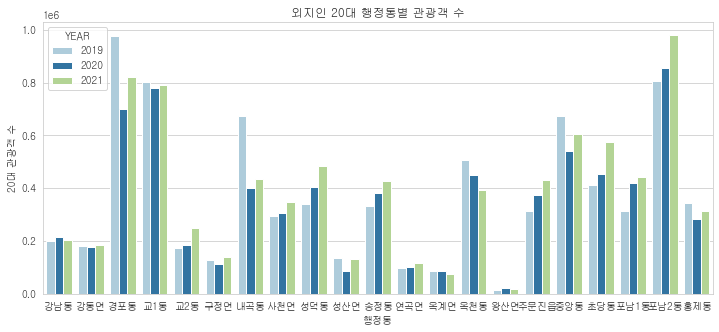

In [253]:
#외지인 중 20대 행정동별 관광객 수 추이
ocnt_20=data2.loc[data2.AGE_DIV_CD=='A2029'][['YEAR','ADMDONG_NM','O_CNT','I_CNT']].groupby(['YEAR','ADMDONG_NM']).sum().reset_index()
ocnt_20['total']=ocnt_20['O_CNT']+ocnt_20['I_CNT']
plt.figure(figsize=(12,5))
sns.barplot(x='ADMDONG_NM',y='total',hue='YEAR',data=ocnt_20,palette="Paired")
plt.ylabel("20대 관광객 수")
plt.xlabel("행정동")
plt.title("외지인 20대 행정동별 관광객 수")

- 가장 관광객 수가 많은 연령대인 20대의 관광객 수를 행정동 별로 살펴보면  
2019년 대비 __초당동, 포남 2동__은 증가폭이 굉장히 큽니다. 이 두 지역의 대표적인 관광지는 커피거리 입니다
- 상권이 발달된 __동지역을 제외하고 2019년 대비 관광객 수가 증가한 행정동은 구정면,사천면,연곡면,왕산면,주문진읍__입니다.

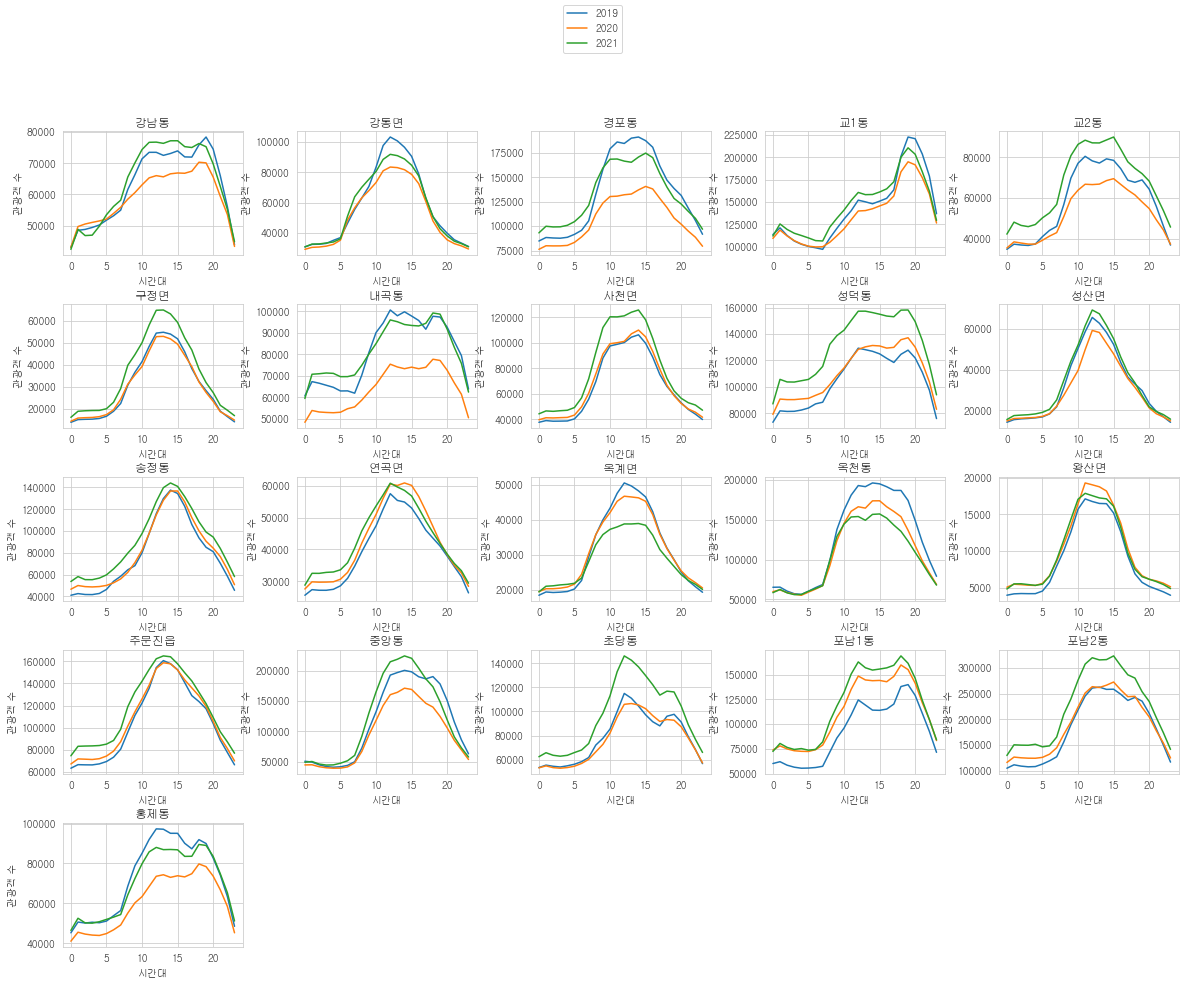

In [254]:
#행정동별 시간대별 관광객 수
#전처리
data3['ETL_YMD']=data3['ETL_YMD'].astype('str')
data3['I_CNT']=data3['I_CNT'].apply(lambda x : x.replace(',',''))
data3['O_CNT']=data3['O_CNT'].apply(lambda x : x.replace(',',''))
data3['F_CNT']=data3['F_CNT'].apply(lambda x : x.replace(' - ','0'))
data3['I_CNT']=data3['I_CNT'].apply(lambda x : x.replace(' - ','0'))
data3['O_CNT']=data3['O_CNT'].apply(lambda x : x.replace(' - ','0'))
data3['F_CNT']=data3['F_CNT'].astype('int')
data3['I_CNT']=data3['I_CNT'].astype('int')
data3['O_CNT']=data3['O_CNT'].astype('int')
data3['YEAR']=data3['ETL_YMD'].apply(lambda x : x[:4])

#행정동별 시간대별 관광객수
time_area=data3[['YEAR','ADMDONG_NM','TIMEZN_DIV_CD','I_CNT','O_CNT','F_CNT']].groupby(['YEAR','ADMDONG_NM','TIMEZN_DIV_CD']).sum()
time_area['total']=time_area['I_CNT']+time_area['O_CNT']+time_area['F_CNT']
time_area.reset_index(inplace=True)
fig=plt.figure(figsize=(20,15))
i=1
for area in time_area.ADMDONG_NM.unique():
    ax=fig.add_subplot(5,5,i)
    i+=1
    ax=sns.lineplot(x='TIMEZN_DIV_CD',y='total',data=time_area.loc[time_area['ADMDONG_NM']==area],hue='YEAR')
    plt.title(area)
    ax.get_legend().remove()
    plt.xlabel("시간대")
    plt.ylabel("관광객 수")

plt.subplots_adjust(hspace=0.4,wspace=0.3)
lines, labels = fig.axes[-1].get_legend_handles_labels()  
fig.legend(lines, labels, loc = 'upper center')
plt.show()

- 행정동별 시간대별 관광객수로 지역을 구분하면
1. 전체적으로 관광객 수가 증가한 지역 : 교2동,구정면,사천면,성덕동,송정동,주문진읍,초당동,포남1동,포남2동
2. 밤~익일 아침까지의 관광객수가 증가한 지역 : 강동면,경포동,연곡면,왕산면
3. 활동시간에 관광객수가 증가한 지역 : 강남동,교1동,성산면,증앙동
4. 그외 : 내곡동,옥계면,옥천동,홍제동

,F_CNT
ADMDONG_NM,
강남동,347
강동면,9541
경포동,8636
교1동,998
교2동,1493
구정면,440
내곡동,1443
사천면,1395
성덕동,2290


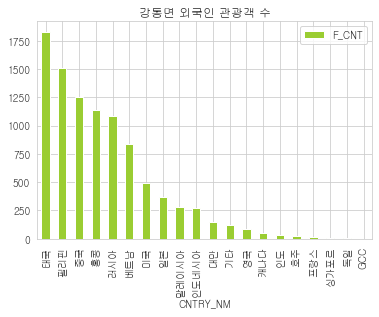

In [255]:
#국적별 관광객 수
data4['F_CNT']=data4['F_CNT'].apply(lambda x : x.replace(' - ','0'))
data4['F_CNT']=data4['F_CNT'].astype('int')
data4['ETL_YMD']=data4['ETL_YMD'].astype('str')

f_area=data4[['ADMDONG_NM','F_CNT']].groupby(['ADMDONG_NM']).sum()
gangdong=data4.loc[data4.ADMDONG_NM=='강동면'][['CNTRY_NM','F_CNT']].groupby(['CNTRY_NM']).sum().sort_values(by=['F_CNT'],ascending=False)
gangdong.plot(kind='bar',color="yellowgreen")
plt.title("강동면 외국인 관광객 수")
f_area

- 이 기간동안 외국인 관광객 수가 가장 많은 강동면은 태국 국적의 사람들이 가장 많이 방문하였습니다.

In [256]:
#행정동별 거주지기반  유입비율

#전처리
data5['ETL_YMD']=data5['ETL_YMD'].astype('str')
data5['YEAR']=data5['ETL_YMD'].apply(lambda x : x[:4])
data5['CITY']=data5['RESD_INFO'].apply(lambda x: x.split(" ")[0])

#r가장 관광객수가 많았던 3개의 행정동의 거주지기반 유입비율 확인
data5.loc[(data5.ADMDONG_NM=='포남2동') | (data5.ADMDONG_NM=='경포동')|(data5.ADMDONG_NM=='교1동') ][['CITY','O_RATE_CNT']].groupby(['CITY']).mean().sort_values(by=['O_RATE_CNT'],ascending=False)

,O_RATE_CNT
CITY,
강원도,1.677506
서울특별시,1.002050
경기도,0.680555
인천광역시,0.497746
세종특별자치도,0.411811
세종특별자치시,0.405056
대전광역시,0.309986
충청북도,0.252636
제주특별자치도,0.207752


- 가장 관광객수가 많았던 3개의 행정동 포남2동, 경포동, 교1동의 유입비율을 살펴보면 전체 강원도 거주지기반 유입비율과 지역이 비슷하나 수도권의 비율이 더 높습니다.

Text(0.5, 1.0, '강원도 강릉시에서 강릉시로의 이동비율')

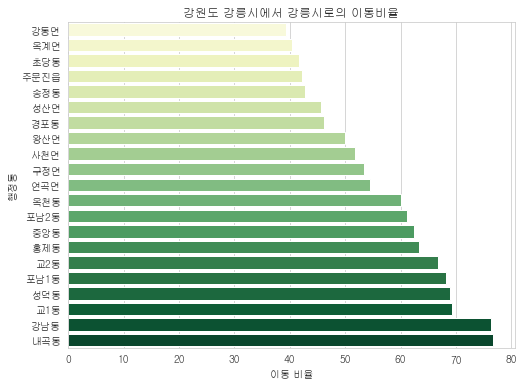

In [257]:
#행정동별 24시간 이후 이동비율(외지인)
#전처리
data6['ETL_YMD']=data6['ETL_YMD'].astype('str')
data6['YEAR']=data6['ETL_YMD'].apply(lambda x : x[:4])
data6['CITY']=data6['RESD_INFO'].apply(lambda x: x.split(" ")[0])

#24시간 이후에도 강릉에 머무는 비율
df=data6.loc[data6.CITY=='강원도'][['RESD_INFO','ADMDONG_NM','O_RATE_CNT']].groupby(['ADMDONG_NM','RESD_INFO']).mean()
city_df=df.xs('강원도 강릉시',level='RESD_INFO').reset_index().sort_values(by=['O_RATE_CNT'])
plt.figure(figsize=(8,6))
sns.barplot(x='O_RATE_CNT',y='ADMDONG_NM',data=city_df,palette="YlGn")
plt.ylabel("행정동")
plt.xlabel("이동 비율")
plt.title("강원도 강릉시에서 강릉시로의 이동비율")

- 24시간 이후에도 외지인이 강원도 강릉시에 있는 비율을 행정동별로 보면 동지역이 상위권을 차지하고 있습니다.
- 동지역이 아닌 지역으로는 연곡면, 사천면, 구정면이 24시간 이상 외지인이 머무는 비율이 상대적으로 높다고 할 수 있습니다,

__전체적으로 강릉의 관광, 관광객 특성, 행정동별 특성을 정리하자면__  

__1. 코로나 시국에도 불구하고, 현지인 관광객의 증가, 전체 관광객 수의 증가__  

__2. 외지인 관광객 수는 2019년 대비 감소추세에서 2021년 회복세를 보이지만 회복폭이 아직 작으며, 
강릉으로의  철도 이용객 수는 지속적으로 감소 추세__  

__3.전체 관광객 수에서는 20,30,40대가 주도하며, 현지인 관광객 수는 50대가, 외지인 관광객 수는 20대가 압도적으로 높다.__  

__4.외지인 관광객 수가 2019년 대비하여 감소했음에도 불구하고,시간대별 관광객 수에서 밤 22시~ 익일 오전까지의   
관광객 수가 2019년 보다 높다   -> 숙박형태의 관광 증가__  

__5. 24시간 이후 외지인, 외국인 이동비율 모두 강원도 내에서의 이동이 가장 많아서 최소 1박 2일은 숙박.__  

__6. 관광객들은 상업과 관광지가 집중되어 있는 동지역에 많이 방문하며, 그 외로는 주문진 시장이 있는 주문진 읍의 관광객 수가 높다__  

__7. 동지역이 아님에도 20대의 관광객 수가 증가한 지역, 동지역이 아님에도 외지인의 머무는 비율이 상대적으로 높은 지역, 시간대별 관광객 수로 숙박형태의 관광 증가 예측이 가능한 지역-> 이 3가지를 모두 만족하는 지역으로 연곡면이 있다.__

# 지역활성화 방안- 강릉의 관광 newbranding

데이터 분석으로 새로운 지역경제활성화 방안은 Tableau로 정리하였습니다.  

Tableau에서 사용하기 위해 따로 분석을 실시한 데이터는 아래와 같고, 대부분의 내용은 위의 분석 내용과 외부데이터를 사용했습니다

## 지역 경제 활성화 방안 : 차박, 캠핑

저희는 위에서 본 강릉의 관광 특성과 더불어 강릉 지역이 코로나 시대 여행 트렌드에 맞는 지역인지 분석하기 위해 한국관광공사에서 발표한 코로나 여행 트렌드 "S.A.F.E.T.Y"에 맞춰 강릉,목포,전주를 비교하여 분석했습니다. 

"S.A.F.E.T.Y"에 적합한 지역인 강릉의 관광을 안전한 방향으로 발전시키기 위한 방안을 찾기 위해 강릉시의 주된 관광객 타겟층을 살펴보고, 타켓층의 최근 트렌드에 맞춰 강릉시에서의 현황과 문제 상황을 알아보았습니다. 

강릉시 관광의 타겟층인 2049의 트렌드에 맞춰 "차박"을 강릉 관광 리브랜딩의 주요 키워드로 선정하고 "차박"에 의해 발생하는 문제상황 해결방안과 지역경제활성화 방안을 다음과 같이 제시합니다. 

차박에 의해 발생하는 문제상황 해결방안을 위해 홍성군의 사례를 벤치마킹하였습니다. 
- 홍성군 "클린캠핑 챌린지"
: 관광공사와 문체부 '제1회 우수 DMO 시상식' 1위
충남 홍성군은 ‘차박’으로 발생하는 민원을 기존 주차장 폐쇄와 같은 강압적인 단속 대신 역발상으로  ‘클린캠핑 약속 서명 이벤트’와 ‘클린캠핑 실천 공유 이벤트(SNS 업로드시 밀키트 제공)’로 차박족들의 합법화를 추진하여 주민과 상생할 수 있는 모델을 발굴하였습니다. 홍성군의 사례를 토대로 차박지를 합법화하는 방법이 오히려 차박족과 주민들에게 서로 윈윈이 됨을 확인하였습니다.

따라서 홍성군의 사례를 벤치마킹하여 차박지를 합법화한 공식 차박지를 지정하고, 지역경제 활성화를 위한 방안도 마련해보았습니다. 


## Tableau에서 사용된 데이터

In [258]:
cul=pd.read_csv("플랫폼통합경진대회 데이터/한국문화정보원)플랫폼통합경진대회 데이터/데이터/국내 지역별 문화체육관광시설 인근 숙박시설 데이터.csv")
sports=pd.read_csv("플랫폼통합경진대회 데이터/한국문화정보원)플랫폼통합경진대회 데이터/데이터/국내 지역별 스포츠관람, 체육시설, 레저스포츠 시설데이터.csv")
drive=pd.read_csv("플랫폼통합경진대회 데이터/한국문화정보원)플랫폼통합경진대회 데이터/데이터/코로나19 안전 드라이브 인 문화생활 목록(2020).csv")

In [259]:
#강릉 캠핑장 갯수
df=pd.DataFrame(columns=cul.columns)
for name in cul.poi_nm.unique():
    if '캠핑' in name:
        part=cul.loc[cul.poi_nm==name]
        df=pd.concat([df,part])

df.groupby(['sido_nm','sgg_nm']).count()
cul_g=df.loc[df.sgg_nm=='강릉시']
cul_g.drop([69207],axis=0,inplace=True)

# 스포츠,체육시설 데이터
sports.loc[sports.mcate_nm=='캠핑장'].groupby(['sido_nm','sgg_nm']).count()
sports.loc[(sports.sgg_nm=='강릉시')&(sports.mcate_nm=='캠핑장')].groupby(['bemd_nm']).count()
sports_g=sports.loc[(sports.sgg_nm=='강릉시')&(sports.mcate_nm=='캠핑장')]
# 드라이브인 데이터
drive_g=drive.loc[(drive.SIGNGU_NM=='강릉시')&(drive.MLSFC_NM=='자연_야영장_자동차')]
drive_g=drive_g.loc[drive.FCLTY_NM=='물내치기']
drive_g=drive_g[['FCLTY_NM','LEGALDONG_NM','FCLTY_LA','FCLTY_LO']]
drive_g.rename(columns={'FCLTY_NM':'poi_nm','LEGALDONG_NM':'bemd_nm','FCLTY_LA':'x','FCLTY_LO':'y'},inplace=True)

#데이터 concat
camping_g=pd.concat([cul_g,sports_g])
camping_g.shape
camping_g=camping_g[['poi_nm','bemd_nm','x','y']]
camping_g=pd.concat([camping_g,drive_g],ignore_index=True)
count_g=camping_g.groupby(['bemd_nm']).count()
count_g=count_g[['poi_nm']]
count_g.rename(columns={'poi_nm':'갯수'},inplace=True)
count_g

,갯수
bemd_nm,
강동면,4
견소동,1
구정면,1
사천면,7
성산면,3
연곡면,13
옥계면,2
왕산면,6
주문진읍,6


In [261]:
#지역별 캠핑장 갯수 비교
#전주
# 숙박시설 데이터
df=pd.DataFrame(columns=cul.columns)
for name in cul.poi_nm.unique():
    if '캠핑' in name:
        part=cul.loc[cul.poi_nm==name]
        df=pd.concat([df,part])

df.groupby(['sido_nm','sgg_nm']).count()

cul_j=df.loc[(df.sgg_nm=='전주시 덕진구') | (df.sgg_nm=='전주시 완산구')]

# 스포츠,체육시설 데이터
sports.loc[sports.mcate_nm=='캠핑장'].groupby(['sido_nm','sgg_nm']).count()
sports_j=sports.loc[(sports.sgg_nm=='전주시 완산구')|(sports.sgg_nm=='전주시 덕진구')]
sports_j.groupby(['bemd_nm']).count()

sports_j=sports_j.loc[(sports_j.mcate_nm=='캠핑장')]



# 드라이브인 데이터

drive_j=drive.loc[(drive.SIGNGU_NM=='전주시 완산구')|(drive.SIGNGU_NM=='전주시 덕진구')]
drive_j=drive_j.loc[(drive_j.MLSFC_NM=='자연_야영장_자동차')]
drive_j=drive_j[['FCLTY_NM','LEGALDONG_NM','FCLTY_LA','FCLTY_LO']]

drive_j.rename(columns={'FCLTY_NM':'poi_nm','LEGALDONG_NM':'bemd_nm','FCLTY_LA':'x','FCLTY_LO':'y'},inplace=True)

#데이터 concat
camping_j=pd.concat([cul_j,sports_j])
camping_j=camping_j[['poi_nm','bemd_nm','x','y']]
count_j=camping_j.groupby(['bemd_nm']).count()
count_j=count_j.drop(columns=['x','y'])
count_j.rename(columns={'poi_nm':'갯수'},inplace=True)

#목포
# 숙박시설 데이터

df=pd.DataFrame(columns=data.columns)
for name in cul.poi_nm.unique():
    if '캠핑' in name:
        part=cul.loc[cul.poi_nm==name]
        df=pd.concat([df,part])

df.groupby(['sido_nm','sgg_nm']).count()

cul_m=df.loc[(df.sgg_nm=='목포시')]
# 스포츠,체육시설 데이터
sports.loc[sports.mcate_nm=='캠핑장'].groupby(['sido_nm','sgg_nm']).count()
sports_m=sports.loc[(sports.sgg_nm=='목포시')]

sports_m.groupby(['bemd_nm']).count()

sports_m=sports_m.loc[(sports_m.mcate_nm=='캠핑장')]
# 드라이브인 데이터
drive_m=drive.loc[(drive.SIGNGU_NM=='목포시')]
drive_m=drive_m.loc[(drive_m.MLSFC_NM=='자연_야영장_자동차')]
#데이터 concat
camping_m=pd.concat([cul_m,sports_m])
camping_m=camping_m[['poi_nm','bemd_nm','x','y']]

count_m=camping_m.groupby(['bemd_nm']).count()
count_m=count_m.drop(columns=['x','y'])
count_m.rename(columns={'poi_nm':'갯수'},inplace=True)

#캠핑장 갯수 도출
count_g=count_g.append({'bemd_nm':'강릉_전체','갯수':sum(count_g['갯수'])},ignore_index=True)
count_j=count_j.append({'bemd_nm':'전주_전체','갯수':sum(count_j['갯수'])},ignore_index=True)
count_m=count_m.append({'bemd_nm':'목포_전체','갯수':sum(count_m['갯수'])},ignore_index=True)
total=pd.concat([count_g.tail(1),count_j.tail(1)])
total=pd.concat([total,count_m.tail(1)])
total

,갯수,bemd_nm
10,45,강릉_전체
1,2,전주_전체
2,2,목포_전체


In [ ]:
#"민폐"크롤링
##네이버 카페 '차박캠핑클럽'에서 '민폐' 검색 후 게시글 본문,제목 크롤링

from selenium import webdriver
import time


driver = webdriver.Chrome('chromedriver.exe')
driver.implicitly_wait(3)

# 네이버 로그인
driver.get('https://nid.naver.com/nidlogin.login')
driver.find_element_by_name('id').send_keys('randomid') # 아이디 (임의로 수정)
driver.find_element_by_name('pw').send_keys('abcabc123') # 비밀번호 (임의로 수정)



주소=[]
page=0

while page < 13:
    try:
        page+=1
        driver.get(f"https://cafe.naver.com/chcamping?iframe_url=/ArticleSearchList.nhn%3Fsearch.clubid=27087488%26search.media=0%26search.searchdate=all%26search.exact=%26search.include=%26userDisplay=20%26search.exclude=[%C8%B8%C4%A2%C0%A7%B9%DD%B1%DB]%26search.option=0%26search.sortBy=sim%26search.searchBy=0%26search.includeAll=%26search.query=%B9%CE%C6%F3%26search.viewtype=title%26search.page={page}")
        driver.switch_to_frame("cafe_main")
        
        except:
            pass
        for i in range(1,51,1):
            주소.append(driver.find_element_by_xpath(f"/html/body/div[1]/div/div[5]/table/tbody/tr[{i}]/td[1]/div[2]/div/a[1]").get_attribute("href"))
        
        driver.switch_to_default_content()
    except:
        pass

제목=[]
내용=[]
for url in 주소:
    driver.get(url)
    driver.switch_to_frame("cafe_main")
    제목.append(driver.find_element_by_xpath("/html/body/div/div/div/div[2]/div[1]/div[1]/div").text)
    내용.append(driver.find_element_by_xpath("/html/body/div/div/div/div[2]/div[2]/div[1]/div").text)
    
df=pd.DataFrame({"제목":제목 ,"내용":내용})
df.to_excel("test.xlsx")

데이터를 .xlsx 에서 .txt로 저장후 다시 열어준다. 

df=pd.DataFrame({"title":title ,"content":content, "date":date})
df.to_excel("test.xlsx")

filename = '/content/drive/MyDrive/민폐크롤링.txt' 
f = open(filename, 'r', encoding ='cp949')
txt = f.readlines()
f.close() 

# 텍스트 데이터 전처리 함수
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[0-9]+'          # 숫자제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text   


# 텍스트 데이터 전처리 함수 적용
clean_txt = []
for i in range(len(txt)):
    clean_txt.append(clean_str(txt[i]))

# 명사 찾는 함수 만들기(Kkma 클래스 이용)
from konlpy.tag import Kkma
kkma = Kkma()
def clean_noun(txt):
    noun_list = []
    for i in txt:
        nouns = kkma.nouns(i)
        for noun in nouns:
            noun_list.append(noun)
    return noun_list

noun_list = clean_noun(clean_txt)


#한글자 명사 제거 
noun_list1 = []
for i,v in enumerate(noun_list):
    if len(v)>=2:
        text2 = noun_list.pop(i)
        noun_list1.append(text2)


# 불용어 사전 만들기 
stop_word = '울릉도 독도 북도 남도 있음 주소 차박 위치 여행 관광 번호 영업 시간 지역 민폐 계획 캠핑 캠핑장 이번 가성 강릉여행 강원도여행 댓글 도착 제목 말머리 내가 나의 년간 가입 인사 가입인사 후기 차박후기 며칠 두고 영업시간 우리 전화번호 다음 주차장 안녕 한번 포스팅 번째 정도 하나 소개 여기 최대 리뷰 투어 공유 이웃신청 첫날 나라 지방 홈페이지 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 서울특별시 서울시 서울 종로구 중구 용산구 성동구 광진구 동대문구 중랑구 성북구 강북구 도봉구 노원구 은평구 서대문구 마포구 양천구 강서구 구로구 금천구 영등포구 동작구 관악구 서초구 강남구 송파구 강동구 서울여행 서울시여행 서울특별시여행 종로 용산 성동 광진 중랑 성북 강북 도봉 노원 은평 마포 양천 강서 구로 금천 영등포 동작 관악 서초 강남 송파 강동 부산광역시 부산시 부산 중구 서구 동구 영도구 부산진구 동래구 남구 북구 해운대구 사하구 금정구 강서구 연제구 수영구 사상구 기장군 부산여행 부산광역시여행 부산시여행 영도 부산진 동래 사하 금정 연제 사상 기장 해운대 대구광역시 대구시 대구 수성구 달서구 달성군 수성 달서 달성 대구여행 대구광역시여행 대구시여행 인천광역시 인천시 인천 미추홀구 연수구 남동구 부평구 계양구 강화군 옹진군 인천여행 인천광역시여행 인천시여행 미추홀 연수 남동 부평 계양 강화 옹진 대전광역시 대전시 대전 유성구 대덕구 유성 대덕 대전여행 대전광역시여행 대전시여행 울산광역시 울산시 울산 울주군 울주 울산여행 울산광역시여행 울산시여행 광주광역시 광주시 광주 광산구 광산 광주여행 광주광역시 여행 광주시여행 강원도 강원 강릉시 동해시 삼척시 속초시 원주시 춘천시 태백시 고성군 양구군 양양군 영월군 인제군 정선군 철원군 평창군 홍천군 화천군 횡성군 강릉 삼척 속초 원주 춘천 태백 고성 양구 양양 영월 인제 정선 철원 평창 홍천 화천 횡성 강원도여행 강원여행 충청북 충청북도 충청도 충청 충북 제천 청주 충주 제천시 청주시 충주시 충청도여행 충청여행 충북여행 충남여행 충청북도여행 충청남도여행 괴산군 단양군 보은군 영동군 옥천군 음성군 증평군 진천군 괴산 단양 보은 영동 옥천 음성 증평 진천 충청남도 충청북 충청남 충남 계룡시 공주시 논산시 당진시 보령시 서산시 아산시 천안시 계룡 공주 논산 당진 보령 서산 아산 천안 금산군 부여군 서천군 예산군 청양군 태안군 홍성군 금산 부여 서천 예산 청양 태안 홍성 경기도 경기 고양시 과천시 광명시 광주시 구리시 군포시 김포시 남양주시 동두천시 부천시 성남시 수원시 시흥시 안산시 안성시 안양시 양주시 여주시 오산시 용인시 의왕시 의정부시 이천시 파주시 평택시 포천시 하남시 화성시 가평군 양평군 연천군 경기도여행 경기여행 고양 과천 광명 구리 군포 김포 남양주 동두천 부천 성남 수원 시흥 안산 안성 안양 양주 여주 오산 용인 의왕 의정부 이천 파주 평택 포천 하남 화성 가평 양평 연천 경상남도 경상도 경상 경남 경남여행 경상여행 경상도여행 경상남도여행 경상북도여행 경상북 경상남 거제시 김해시 밀양시 사천시 양산시 진주시 창원시 통영시 거제 김해 밀양 사천 양산 진주 창원 통영 거창군 고성군 남해군 산청군 의령군 창녕군 하동군 함안군 함양군 합천군 거창 고성 산청 의령 창녕 하동 함안 함양 합천 경상북도 경북 경북여행 경산시 경주시 구미시 김천시 문경시 상주시 안동시 영주시 영천시 포항시 경산 경주 구미 김천 문경 상주 안동 영주 영천 포항 고령군 군위군 봉화군 성주군 영덕군 영양군 예천군 울릉군 울진군 의성군 청도군 청송군 칠곡군 고령 군위 봉화 성주 영덕 영양 예천 울릉 울진 의성 청도 청송 칠곡 전라남도 전라도 전남 전라 광양시 나주시 목포시 순천시 여수시 광양 나주 목포 순천 여수 전라여행 전라도여행 전라북도여행 전라남도여행 전라남 전라북 전남여행 전북여행 강진군 고흥군 곡성군 구례군 담양군 무안군 보성군 신안군 영광군 영암군 강진 고흥 곡성 구례 담양 무안 보성 신안 영광 영암 완도군 장성군 장흥군 진도군 함평군 해남군 화순군 완도 장성 장흥 진도 함평 해남 화순 전라북도 전북 군산시 김제시 남원시 익산시 전주시 정읍시 군산 김제 남원 익산 전주 정읍 고창군 무주군 부안군 순창군 완주군 임실군 장수군 진안군 고창 무주 부안 순창 완주 임실 장수 진안'
st_ls = stop_word.split(' ')

# 불용어 제거 
fffnal_ls = []
for word in noun_list1:
    if word not in st_ls:
        fffnal_ls.append(word)
final = ' '.join(fffnal_ls)
final
numbers_final = final.split(' ')

from collections import Counter
count = Counter(numbers_final) # input type should be a list of words (or tokens)

태블로에서 사용할 수 있도록 csv로 저장

DF = pd.DataFrame.from_dict(count, orient='index').reset_index()
DF.to_csv('/content/drive/MyDrive/민폐 word count.csv' , encoding = 'cp949')

# 사용한 데이터

## 제공데이터

- KORAIL)플랫폼통합경진대회 데이터  

고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2019  
고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2020  
고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2021  
역별 승하차실적_2018  
역별 승하차실적_2019  
역별 승하차실적_2020  
역별 승하차실적_2021  

- KT)플랫폼통합경진대회 데이터  

(KT)플랫폼통합경진대회_강릉시_시군구_1.일별관광객수  
(KT)플랫폼통합경진대회_강릉시_시군구_2.성연령별관광객수  
(KT)플랫폼통합경진대회_강릉시_시군구_3.시간대별관광객수  
(KT)플랫폼통합경진대회_강릉시_시군구_4.국적별관광객수  
(KT)플랫폼통합경진대회_강릉시_시군구_6.거주지기반유입비율  
(KT)플랫폼통합경진대회_강릉시_시군구_7.24시간이후이동비율(외지인)  
(KT)플랫폼통합경진대회_강릉시_시군구_8.24시간이후유출비율(외국인)  
(KT)플랫폼통합경진대회_강릉시_행정동_1.일별관광객수  
(KT)플랫폼통합경진대회_강릉시_행정동_2.성연령별관광객수  
(KT)플랫폼통합경진대회_강릉시_행정동_3.시간대별관광객수  
(KT)플랫폼통합경진대회_강릉시_행정동_4.국적별관광객수  
(KT)플랫폼통합경진대회_강릉시_행정동_6.거주지기반유입비율  
(KT)플랫폼통합경진대회_강릉시_행정동_7.24시간이후이동비율(외지인)  

- 한국문화정보원)플랫폼통합경진대회 데이터  

국내 지역별 문화체육관광시설 인근 숙박시설 데이터  
국내 지역별 스포츠관람, 체육시설, 레저스포츠 시설데이터  
코로나19 안전 드라이브 인 문화생활 목록(2020)

## 외부데이터 

- 한국관광데이터랩  
https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do  
국민여행조사_국내여행_여행지별_관광여행 횟수  
지역별 관광지 검색 순위
국민 해외관광객  
관광지 유형별 검색건수  
우리 지역 관광 상황판   
-KOSIS 국가 통계포털  
https://kosis.kr/index/index.do  
관광 숙박 여행 동반자 수 분포(본인포함)  
-네이버 데이터랩  
https://datalab.naver.com/  
(검색어) 캠핑, 차박, 여행, 호캉스, 오토캠핑  
-글로벌빅데이터연구소  
http://www.globalbigdata.re.kr/  
숙박유형별 SNS 관심도 추이  
-네이버카페 "차박캠핑클럽"  
https://cafe.naver.com/chcamping

## 그외 자료 출처


- Flaticon  
https://www.flaticon.com/  
- 강릉시청  
https://www.gn.go.kr/www/contents.do?key=694  
- Korail  
https://www.letskorail.com/ebizprd/stationKtxList.do
- "전기차, '차박(車泊)문화'의 새 지평을 열다"  z
http://www.outdoornews.co.kr/news/articleView.html?idxno=30181
http://www.upinews.kr/newsView/upi202002130078
https://news.nate.com/view/20210615n01617
- "언택트 시대 '차박' 뜬다…텐트 안 숙박 '캠핑' 관심도는 주춤"  
https://mobile.newsis.com/view.html?ar_id=NISX20200727_0001108945#_enliple  
-  안전의식’이 바꾼 여행 트렌드 ‘S.A.F.E.T.Y’  
https://kto.visitkorea.or.kr/viewer/view.kto?id=69284&type=bd